In [186]:
# CONSTANTS

TRAIN_DATA = './data/train_data.csv'
TRAIN_LABEL = './data/train_labels.csv'

TEST_DATA = './data/test_data.csv'
TRAIN_LABEL = './data/test_labels.csv'

In [187]:
# CONFIG

class CONFIG:

    load_pickle = True
    
    is_toy = False
    toy_size = 40
    epochs = 20
    validation_split = 0.2
    
    punctuations = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~'
    

#     @staticmethod
#     def get_log_dir():
#         return "/tmp/tensorflow/MNIST/logs/{}".format(datetime.now().strftime('%y-%m-%d-%X'))

In [188]:
# DATA LOAD

import pandas as pd
import numpy as np

def data_load():
    train_labels_df = pd.read_csv(TRAIN_LABEL, usecols=['document_name','is_fitara'])
    train_data_df = pd.read_csv(TRAIN_DATA)
    
    return train_labels_df, train_data_df

ori_train_labels_df, ori_train_data_df = data_load()
print('INFO - Data load complete')

INFO - Data load complete


In [189]:
# IS TOY?

if CONFIG.is_toy:
    train_labels_df = ori_train_labels_df.sample(n=CONFIG.toy_size)
    train_data_df = ori_train_data_df[ori_train_data_df.document_name.isin(train_labels_df.document_name.tolist())]
else:
    train_labels_df = ori_train_labels_df
    train_data_df = ori_train_data_df
    

In [190]:
print(train_labels_df.shape)
print(train_data_df.shape)

(955, 2)
(955, 2)


In [191]:
train_labels_df.head(10)

,document_name,is_fitara
0,04-42RFP.pdf,No
1,1_-_Brand_name_JOFOC_1782798.pdf,No
2,1_-_Brand_Name_JOFOC_for_FBO.docx,No
3,1_-_Brand_Name_Only.docx,Yes
4,1_-_JOFOC_-_FSSI_Limited_Source.doc,Yes
5,1_-_JOFOC_for_posting.docx,No
6,1_-_RFQ-RML-E-1782798.docx,No
7,1_-_Terms_&_Conditions.docx,No
8,1_-_Terms_&_Conditions_for_posting.docx,No
9,1_-_Terms_&_Conditions_for_Posting_NOI-RML-E-1...,No


In [192]:
train_data_df.head(10)

,document_name,text
0,04-42RFP.pdf,\n \nOMB No. 0990-0115 \n \n Electronic Requ...
1,1-2017_Qualstar_SOW.pdf,1 \n \n \n1 of 2 \n \nStatement of Work (SOW) ...
2,1-JOFOC_redacted.pdf,Justification for Other than Full and Open Com...
3,1-SOW__AB_SCIEX.doc,STATEMENT OF WORK\r\r1 Year EOL Maintenance 1P...
4,1-_BRAND_NAME_JOFOC_-_for_posting.docx,Justification for Other than Full and Open Com...
5,1-_JOFOC_posting4.docx,Justification for Other than Full and Open Com...
6,1-_JOFOC_posting5.docx,Justification for Other than Full and Open Com...
7,1200041I_Limited_Source_Justification.pdf,"Limited Source Justiﬁcation\n\n \n\n \n\n""Sour..."
8,1200120U_Limited_Source_Justification.pdf,Limited Source Justiﬁcation\n\n \n\n \n\n“Sour...
9,13_148.doc,OMB No. 0990-0115 \r\r\tElectronic Request for...


In [193]:
train_labels_df.is_fitara = train_labels_df.is_fitara.eq('Yes').mul(1)

train_labels_df.head()

,document_name,is_fitara
0,04-42RFP.pdf,0
1,1_-_Brand_name_JOFOC_1782798.pdf,0
2,1_-_Brand_Name_JOFOC_for_FBO.docx,0
3,1_-_Brand_Name_Only.docx,1
4,1_-_JOFOC_-_FSSI_Limited_Source.doc,1


In [194]:
train_df  = pd.merge(
    train_labels_df, 
    train_data_df, 
    on='document_name', 
    how='inner'
)

train_df.head()

,document_name,is_fitara,text
0,04-42RFP.pdf,0,\n \nOMB No. 0990-0115 \n \n Electronic Requ...
1,1_-_Brand_name_JOFOC_1782798.pdf,0,\n \nJustification for Other than Full and Op...
2,1_-_Brand_Name_JOFOC_for_FBO.docx,0,Justification for Other than Full and Open Com...
3,1_-_Brand_Name_Only.docx,1,Justification for Other than Full and Open Com...
4,1_-_JOFOC_-_FSSI_Limited_Source.doc,1,Attachment C\r\r\rHHS Template and Instruction...


In [195]:
print(train_df.describe())
print('----------')
print(train_df.shape)

        is_fitara
count  955.000000
mean     0.286911
std      0.452557
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      1.000000
----------
(955, 3)


In [196]:
import spacy

def load_spacy():
    print('INFO - Loading Spacy, may take a while.')
    nlp_spacy = spacy.load("en_core_web_md")
    print('INFO - Loading Spacy complete')
    print(spacy.info())
    return nlp_spacy

nlp_spacy

if nlp_spacy is None:
    nlp_spacy = load_spacy()
else:
    print('INFO - Spacy already in place.')
    print(spacy.info())

INFO - Spacy already in place.

============================== Info about spaCy ==============================

spaCy version    2.1.8                         
Location         /opt/conda/lib/python3.7/site-packages/spacy
Platform         Linux-4.9.184-linuxkit-x86_64-with-debian-buster-sid
Python version   3.7.3                         
Models                                         

{'spaCy version': '2.1.8', 'Location': '/opt/conda/lib/python3.7/site-packages/spacy', 'Platform': 'Linux-4.9.184-linuxkit-x86_64-with-debian-buster-sid', 'Python version': '3.7.3', 'Models': ''}


In [197]:
# PRE_PROCESSING

def data_pre_processing(text):

    print("INFO - processing - " + text[:4])
#     text = text[:200]
#     print(text)
    texts = []
    doc = nlp_spacy(text, disable=['parser', 'ner'])
    tokens = [token for token in doc if not token.is_stop]
    tokens = [token for token in tokens if not token.is_punct]
    tokens = [token.lemma_.lower().strip() for token in tokens if token.lemma_ != '-PRON-']
    tokens = ' '.join(tokens)
    print(len(tokens))
    texts.append(tokens)
    return pd.Series([texts, len(tokens)])

result = train_df['text'].apply(lambda x: data_pre_processing(x))
train_df['processed_text'], train_df['wc'] = result[0], result[1]

INFO - processing -  
 

138699
INFO - processing -  
 

4441
INFO - processing - Just
3037
INFO - processing - Just
2997
INFO - processing - Atta
8369
INFO - processing - Just
3360
INFO - processing - FedB
3485
INFO - processing - 52.2
41325
INFO - processing - 52.2
36045
INFO - processing - 52.2
51261
INFO - processing - 52.2
51805
INFO - processing - STAT
10560
INFO - processing - Just
2485
INFO - processing - Just
2618
INFO - processing - Just
2821
INFO - processing -  
 

175394
INFO - processing - Stat
11305
INFO - processing - Limi
5652
INFO - processing - Limi
5647
INFO - processing - 1 
 
3241
INFO - processing - OMB 
87183
INFO - processing - 
185117
INFO - processing - Stat
3574
INFO - processing - Stat
5580
INFO - processing - STAT
1447
INFO - processing - Just
4392
INFO - processing -  
 

4194
INFO - processing - —‘ ﬁ
11644
INFO - processing -  
 

3932
INFO - processing -  
 

3752
INFO - processing - 52.2
14138
INFO - processing - Stat
10254
INFO - processing - NIH 
61

13882
INFO - processing - RFP-
4726
INFO - processing - Atta
7240
INFO - processing - A'dm
776
INFO - processing - APPL
1235
INFO - processing - Atta
9840
INFO - processing - ATTA
2799
INFO - processing - ATTA
3278
INFO - processing - Task
10799
INFO - processing - Atta
52111
INFO - processing - PACK
3340
INFO - processing - |L_

3784
INFO - processing - Atta
1100
INFO - processing - RFP_
615
INFO - processing - ATTA
20200
INFO - processing - WIRE
30507
INFO - processing - STAT
3155
INFO - processing - ATTA
9815
INFO - processing - ATTA
15619
INFO - processing - ATTA
2593
INFO - processing - :38 
4074
INFO - processing - _._.
501
INFO - processing - 5601
264179
INFO - processing - STAT
17476
INFO - processing - Draw
748
INFO - processing - FB
T
7588
INFO - processing - 1E14
10421
INFO - processing -   
A
595
INFO - processing -   
A
674
INFO - processing - STAT
2347
INFO - processing - - 1 
362923
INFO - processing - Depa
180228
INFO - processing - AMEN
7191
INFO - processing - AMEN
11

14356
INFO - processing - 52.2
13092
INFO - processing - 2/29
2229
INFO - processing - Sour
9688
INFO - processing - Seni
3999
INFO - processing - Perf
5985
INFO - processing -  
 

13924
INFO - processing - U.S.
366040
INFO - processing - U.S.
359036
INFO - processing - U.S.
371476
INFO - processing - \H


1198
INFO - processing - STAT
2509
INFO - processing -  
 

5053
INFO - processing -  
 

5053
INFO - processing - - 1 
380020
INFO - processing - 1 
P
906
INFO - processing - 1 
 
11248
INFO - processing -  
 

3195
INFO - processing - PRES
8196
INFO - processing -  
 

4213
INFO - processing - 1 
 
7911
INFO - processing - 1 
 
11468
INFO - processing - PRIC
45
INFO - processing - NIAI
18623
INFO - processing - 1 
 
18895
INFO - processing - 1 
P
18926
INFO - processing - 1 
P
18930
INFO - processing - 1 
 
19437
INFO - processing - HHSA
17129
INFO - processing - NIH 
71633
INFO - processing -  
 

24935
INFO - processing -  
 

25169
INFO - processing - Perf
62103
INFO - processi

12329
INFO - processing - The 
4506
INFO - processing - Stat
2508
INFO - processing - SECT
13059
INFO - processing - SECT
13323
INFO - processing - Depa
2937
INFO - processing - Tabl
6480
INFO - processing - STAT
3325
INFO - processing - 1 
 
41882
INFO - processing -  
1 
41546
INFO - processing - SECT
32619
INFO - processing - SECT
29950
INFO - processing - SECT
30422
INFO - processing - Rock
6043
INFO - processing - Exhi
17813
INFO - processing - Depa
4473
INFO - processing - Fern
4604
INFO - processing - Fish
4728
INFO - processing - STAT
2234
INFO - processing - STAT
2703
INFO - processing - SoW 
2434
INFO - processing - 
7101
INFO - processing - 
7101
INFO - processing - STAT
3419
INFO - processing - 
7101
INFO - processing - DESC
2037
INFO - processing - NIAI
51667
INFO - processing - STAT
2388
INFO - processing - Stat
7297
INFO - processing - STAT
2685
INFO - processing - Stat
3661
INFO - processing -  
Pa
56708
INFO - processing - STAT
3685
INFO - processing - NIAI
1583
INF

In [198]:
train_df.to_pickle('fitara.pkl')
# train_df = pd.read_pickle('fitara.pkl')

In [210]:
### - LOAD FROM PICKLE TO SAVE ON SPACY PROCESSING TIME
# train_df = pd.read_pickle('fitara.pkl')
train_df.head(10)

,document_name,is_fitara,text,processed_text,wc
0,04-42RFP.pdf,0,\n \nOMB No. 0990-0115 \n \n Electronic Requ...,[ omb 0990 0115 electronic request proposal ...,138699
1,1_-_Brand_name_JOFOC_1782798.pdf,0,\n \nJustification for Other than Full and Op...,[ justification open competition brand simpl...,4441
2,1_-_Brand_Name_JOFOC_for_FBO.docx,0,Justification for Other than Full and Open Com...,[justification open competition brand simplifi...,3037
3,1_-_Brand_Name_Only.docx,1,Justification for Other than Full and Open Com...,[justification open competition brand simplifi...,2997
4,1_-_JOFOC_-_FSSI_Limited_Source.doc,1,Attachment C\r\r\rHHS Template and Instruction...,[attachment c hhs template instructions just...,8369
5,1_-_JOFOC_for_posting.docx,0,Justification for Other than Full and Open Com...,[justification open competition brand simplifi...,3360
6,1_-_RFQ-RML-E-1782798.docx,0,FedBizOps Synopsis Document Type: Combined Sy...,[fedbizops synopsis document type combined sy...,3485
7,1_-_Terms_&_Conditions.docx,0,"52.203-98, Prohibition on Contracting with Ent...",[52.203 98 prohibition contract entity require...,41325
8,1_-_Terms_&_Conditions_for_posting.docx,0,"52.203-98, Prohibition on Contracting with Ent...",[52.203 98 prohibition contract entity require...,36045
9,1_-_Terms_&_Conditions_for_Posting_NOI-RML-E-1...,0,"52.203-98, Prohibition on Contracting with Ent...",[52.203 98 prohibition contract entity require...,51261


In [211]:
train_df.describe()

,is_fitara,wc
count,955.000000,955.000000
mean,0.286911,49120.867016
std,0.452557,89953.993765
min,0.000000,38.000000
25%,0.000000,3029.000000
50%,0.000000,9884.000000
75%,1.000000,34978.500000
max,1.000000,759107.000000


ValueError: 'c' argument has 2 elements, which is not acceptable for use with 'x' with size 955, 'y' with size 955.

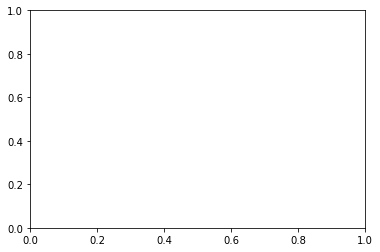

In [ ]:
##### IGNORE --------

In [8]:
doc = nlp_spacy(train_df.text[0])

In [64]:
doc_wc = (len(doc))
doc_sc = (len(list(doc.sents)))
doc_ents = list(doc.ents)

In [9]:


def ents_for_doc(doc):
    ent_labels = []
    for ent in doc.ents:
        ent_labels.append(ent.label_)
    return ent_labels
ent_labels = ents_for_doc(doc)

doc_ent_PERSON_count = ent_labels.count("PERSON")
doc_ent_ORG_count = ent_labels.count("ORG")
doc_ent_DATE_count = ent_labels.count("DATE")
doc_ent_TIME_count = ent_labels.count("TIME")
doc_ent_CARDINAL_count = ent_labels.count("CARDINAL")
doc_ent_MONEY_count = ent_labels.count("MONEY")
doc_ent_LAW_count = ent_labels.count("LAW")
doc_ent_GPE_count = ent_labels.count("GPE")
doc_ent_PERCENT_count = ent_labels.count("PERCENT")

In [17]:
wc = []
sc = []
ents = []
doc_ent_PERSON_count = []
doc_ent_ORG_count = []
doc_ent_DATE_count = []
doc_ent_TIME_count = []
doc_ent_CARDINAL_count = []
doc_ent_MONEY_count = []
doc_ent_LAW_count = []
doc_ent_GPE_count = []
doc_ent_PERCENT_count = []

def extact_doc_info(row):
    global wc
    global sc
    global ents
    global doc_ent_PERSON_count
    global doc_ent_ORG_count
    global nlp
    
    print(row.document_name)
    global nlp
    
    doc = nlp(row.text)
    
    wc.append(len(doc))
    sc.append(len(list(doc.sents)))
    ents.append((list(doc.ents)))
    ent_labels = ents_for_doc(doc)
    doc_ent_PERSON_count.append(ent_labels.count("PERSON"))
    doc_ent_ORG_count.append(ent_labels.count("ORG"))
    doc_ent_DATE_count.append(ent_labels.count("DATE"))
    doc_ent_TIME_count.append(ent_labels.count("TIME"))
    doc_ent_CARDINAL_count.append(ent_labels.count("CARDINAL"))
    doc_ent_MONEY_count.append(ent_labels.count("MONEY"))
    doc_ent_LAW_count.append(ent_labels.count("LAW"))
    doc_ent_GPE_count.append(ent_labels.count("GPE"))
    doc_ent_PERCENT_count.append(ent_labels.count("PERCENT"))
    return 1

# for i in range(len(train_df)):
for i in range(10):
    extact_doc_info(train_df.iloc[i])
    print(i)



04-42RFP.pdf
0
1_-_Brand_name_JOFOC_1782798.pdf
1
1_-_Brand_Name_JOFOC_for_FBO.docx
2
1_-_Brand_Name_Only.docx
3
1_-_JOFOC_-_FSSI_Limited_Source.doc
4
1_-_JOFOC_for_posting.docx
5
1_-_RFQ-RML-E-1782798.docx
6
1_-_Terms_&_Conditions.docx
7
1_-_Terms_&_Conditions_for_posting.docx
8
1_-_Terms_&_Conditions_for_Posting_NOI-RML-E-1825645.docx
9


In [15]:
import multiprocessing

def test(i):    
    txt_1st = "this is the first sentence of {}".format(i)
    txt_2nd = "this is the second sentence of {}".format(i)
    global nlp
    
    print(txt_1st)
    parsed_txt_1st = nlp(txt_1st)
    print(txt_2nd)
    parsed_txt_2nd = nlp(txt_2nd)
    return parsed_txt_1st, parsed_txt_2nd


pool = multiprocessing.Pool(processes=2)
data = range(9)
results = pool.map(test, data)
pool.close()
pool.join()
    
print(results)

# for i in range(9):
#     print(test(i))
    


this is the first sentence of 0
this is the first sentence of 2
this is the second sentence of 0
this is the second sentence of 2
this is the first sentence of 1
this is the first sentence of 3
this is the second sentence of 1
this is the second sentence of 3
this is the first sentence of 4
this is the second sentence of 4
this is the first sentence of 5
this is the second sentence of 5
this is the first sentence of 6
this is the second sentence of 6
this is the first sentence of 7
this is the second sentence of 7
this is the first sentence of 8
this is the second sentence of 8
[(this is the first sentence of 0, this is the second sentence of 0), (this is the first sentence of 1, this is the second sentence of 1), (this is the first sentence of 2, this is the second sentence of 2), (this is the first sentence of 3, this is the second sentence of 3), (this is the first sentence of 4, this is the second sentence of 4), (this is the first sentence of 5, this is the second sentence of 5), 

In [21]:
for entry in ents[1]:
    print(entry)

Brand-Name
Brand Name –
NIH
NIAID/DIR/LID/ Viral Pathogenisis & Evolution Section
Requestors
Tyler Bristol  
 
Requestors
301
33
Bethesda
MD 
 
II
1782798
37,333.10
VPES
the Laboratory of Infectious 
Disease
VPES
F. Description
QTY AT
1
PE-Cy7
100
337167 00382903371679
4
2
50
4
3
APC
4
4
340951
00382903409518
4
5
PE
341009 00382903410095
4
6
APC
100
340439
00382903404391
6
7
341654
11
555428 00382905554285
2
PE
557864 00382905578649
4
10
PerCP-Cy5.5
558714 00382905587146
1
00382905609053
15
13
3
1
16 Hu CD196
PE-Cy7
560620 00382905606205
4
CCR7
150503
00382905607653
2
18
Hu
APC-H7
00382905607349
15
00382905606090
4
00382905601767 

4
21
12
22
Hu CD39 FITC
561444 00382905614446
2
23
APC-H7
00382905555169
4
00382905601798
8
00382905581120
1
Hu HLA-DR
00382905612244
29
28
USC
Par
6
Only one
Brand Name
8
4
5
Federal Supply Schedule
FSS
NIH
41
USC
3304(a)(5
F AR  
Par
6
NIH
Beckman Dickson
several 
years
only one
the Contracting Officer
CO


In [49]:
sc

[2305, 166, 37, 32, 168, 38, 47, 702, 776, 980]

In [50]:
doc_ent_PERSON_count

[37, 8, 3, 1, 7, 2, 3, 16, 24, 24]

In [51]:
doc_ent_ORG_count

[610, 28, 15, 21, 36, 34, 11, 265, 172, 284]

In [27]:
print(train_df.text[16])

Statement of Work
Data Analysis, Review and Entry into the PIDTC System
POP 2/15/17 to 2/14/18; 
Option year one 2/15/18 to 2/14/19; Option year two 2/15/19 to 2/14/20
1) BACKGROUND INFORMATION
The research program of the Genetic Immunotherapy Section (GIS) in the Laboratory of Host Defenses (LHD), 
NIAID includes clinical protocols that assess natural history of primary immune deficiencies or the use of 
allogeneic transplant or gene therapy to treat these disorders.  The GIS clinical program is particularly focused 
on primary immune deficiencies that include the chronic granulomatous diseases, severe combined immune 
deficiencies and the Wiskott-Aldrich/X-linked thrombocytopenia group. GIS has a major role in development 
and implementation of allogeneic bone marrow transplants and autologous hematopoietic stem cell gene 
therapy clinical trials in the NIH.  GIS/LHD/NIAID is one of the 38 North American transplantation member 
centers comprising the Primary Immune Deficiency Treatme

In [69]:
print(ents)

[1, National Institutes of Health, NIH, Extramual Research, August 23, 2016, 1, The National Institutes of Health, NIH, Office of Extramural Research, OER, NIH, NIH, NIH, NIH Capital 
Investment Fund, OER, NIH, OER, NIH, NIH, 2, Contractor Task, 2.1, XML, 1900 - 2015,  Social Sciences, 1898 - 2015,  Arts, 1975 - 2015,  Book Citation Index Science –, 2005 - 2015,  Book Citation Index - Social Sciences & Humanities –, 2005 - 2015, 1963, 2015,  THOMSON REUTERS IP, 1973, 2015,  THOMSON REUTERS IP, INPADOC, 1836, 2015,  THOMSON, US, 1836 - 2015,  THOMSON REUTERS IP, US, US, 3, 4, twelve 
months, 5, COR 
]
